In [185]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error, mean_absolute_error, r2_score

In [207]:
dataset = pd.read_csv('Task 3 and 4_Loan_Data.csv')

In [208]:
print(dataset)
problematic_rows = dataset[dataset['loan_amt_outstanding'] > dataset['total_debt_outstanding']]
print(len(problematic_rows))
#I have a bit of confusion here like how can be the loan greater than total debt?? maybe i am understanding it wrong

      customer_id  credit_lines_outstanding  ...  fico_score  default
0         8153374                         0  ...         605        0
1         7442532                         5  ...         572        1
2         2256073                         0  ...         602        0
3         4885975                         0  ...         612        0
4         4700614                         1  ...         631        0
...           ...                       ...  ...         ...      ...
9995      3972488                         0  ...         697        0
9996      6184073                         1  ...         615        0
9997      6694516                         2  ...         596        0
9998      3942961                         0  ...         647        0
9999      5533570                         1  ...         757        0

[10000 rows x 8 columns]
1938


In [209]:
dataset['DebtIncomeRatio'] = dataset['total_debt_outstanding']/dataset['income']
dataset = dataset.iloc[:, [0,1,2,3,4,5,6,8,7]]
print(dataset)

      customer_id  credit_lines_outstanding  ...  DebtIncomeRatio  default
0         8153374                         0  ...         0.050173        0
1         7442532                         5  ...         0.308789        1
2         2256073                         0  ...         0.030787        0
3         4885975                         0  ...         0.033645        0
4         4700614                         1  ...         0.075435        0
...           ...                       ...  ...              ...      ...
9995      3972488                         0  ...         0.059818        0
9996      6184073                         1  ...         0.068253        0
9997      6694516                         2  ...         0.126021        0
9998      3942961                         0  ...         0.020481        0
9999      5533570                         1  ...         0.099643        0

[10000 rows x 9 columns]


In [210]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values
print(X.shape)
print(X)
print(y)

(10000, 7)
[[0.00000000e+00 5.22154519e+03 3.91547123e+03 ... 5.00000000e+00
  6.05000000e+02 5.01730146e-02]
 [5.00000000e+00 1.95892873e+03 8.22875252e+03 ... 2.00000000e+00
  5.72000000e+02 3.08789332e-01]
 [0.00000000e+00 3.36300926e+03 2.02783085e+03 ... 4.00000000e+00
  6.02000000e+02 3.07868842e-02]
 ...
 [2.00000000e+00 3.08822373e+03 4.81309093e+03 ... 5.00000000e+00
  5.96000000e+02 1.26021307e-01]
 [0.00000000e+00 3.28890167e+03 1.04309966e+03 ... 2.00000000e+00
  6.47000000e+02 2.04812983e-02]
 [1.00000000e+00 1.91765248e+03 3.05024820e+03 ... 6.00000000e+00
  7.57000000e+02 9.96434486e-02]]
[0 1 0 ... 0 0 0]


In [211]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [212]:
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.2,random_state=0)
X_cv,X_test,y_cv,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=0)

In [213]:
rfr = RandomForestClassifier(n_estimators=100,random_state=0,max_depth=4)
rfr.fit(X_train,y_train)
y_train_pred = rfr.predict(X_train)
y_cv_pred = rfr.predict(X_cv)
y_test_pred = rfr.predict(X_test)

In [214]:
encoded_feature_names = (
    ct.named_transformers_['encoder']
    .get_feature_names_out(input_features=['credit_lines_outstanding'])
)

importances = rfr.feature_importances_
feature_names = list(encoded_feature_names) + list(dataset.columns[2:-1])
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
print(importance_df.sort_values(by='Importance', ascending=False))

                         Feature  Importance
11               DebtIncomeRatio    0.431636
5   credit_lines_outstanding_5.0    0.220354
7         total_debt_outstanding    0.202841
0   credit_lines_outstanding_0.0    0.045472
4   credit_lines_outstanding_4.0    0.034775
9                 years_employed    0.014571
2   credit_lines_outstanding_2.0    0.013926
1   credit_lines_outstanding_1.0    0.013689
10                    fico_score    0.009891
3   credit_lines_outstanding_3.0    0.007611
8                         income    0.003544
6           loan_amt_outstanding    0.001690


In [215]:
metrics = {}

metrics['Train Accuracy'] = r2_score(y_train, y_train_pred)
metrics['Train MSE'] = mean_squared_error(y_train, y_train_pred)
metrics['Train MAE'] = mean_absolute_error(y_train, y_train_pred)

metrics['Validation Accuracy'] = r2_score(y_cv, y_cv_pred)
metrics['Validation MSE'] = mean_squared_error(y_cv, y_cv_pred)
metrics['Validation MAE'] = mean_absolute_error(y_cv, y_cv_pred)

metrics['Test Accuracy'] = r2_score(y_test, y_test_pred)
metrics['Test MSE'] = mean_squared_error(y_test, y_test_pred)
metrics['Test MAE'] = mean_absolute_error(y_test, y_test_pred)

for key, value in metrics.items():
      print(f"{key}: {value:.4f}")

Train Accuracy: 0.9226
Train MSE: 0.0118
Train MAE: 0.0118
Validation Accuracy: 0.8721
Validation MSE: 0.0200
Validation MAE: 0.0200
Test Accuracy: 0.8984
Test MSE: 0.0140
Test MAE: 0.0140


In [216]:
# print(accuracy_score(y_test,y_pred_test))
# print(confusion_matrix(y_test,y_pred_test))

In [217]:
default_probability = rfr.predict_proba(X)[:,1]
print(default_probability)
dataset['defalt_probability'] = default_probability
print(dataset)

[0.00309334 0.94689395 0.00276574 ... 0.01640532 0.00486874 0.01482665]
      customer_id  credit_lines_outstanding  ...  default  defalt_probability
0         8153374                         0  ...        0            0.003093
1         7442532                         5  ...        1            0.946894
2         2256073                         0  ...        0            0.002766
3         4885975                         0  ...        0            0.003108
4         4700614                         1  ...        0            0.015041
...           ...                       ...  ...      ...                 ...
9995      3972488                         0  ...        0            0.004873
9996      6184073                         1  ...        0            0.007290
9997      6694516                         2  ...        0            0.016405
9998      3942961                         0  ...        0            0.004869
9999      5533570                         1  ...        0            0

In [219]:
recovery_rate = 0.1
expected_loss = (1-recovery_rate)*dataset['loan_amt_outstanding']*dataset['defalt_probability']
dataset['expected_loss'] = expected_loss
print(dataset)
print(f"max expected loss : {max(expected_loss)}")
print(f"min expected loss : {min(expected_loss)}")

      customer_id  credit_lines_outstanding  ...  defalt_probability  expected_loss
0         8153374                         0  ...            0.003093      14.536802
1         7442532                         5  ...            0.946894    1669.407986
2         2256073                         0  ...            0.002766       8.371099
3         4885975                         0  ...            0.003108      13.334396
4         4700614                         1  ...            0.015041      18.218480
...           ...                       ...  ...                 ...            ...
9995      3972488                         0  ...            0.004873      13.303792
9996      6184073                         1  ...            0.007290      27.204480
9997      6694516                         2  ...            0.016405      45.596966
9998      3942961                         0  ...            0.004869      14.411517
9999      5533570                         1  ...            0.014827      25

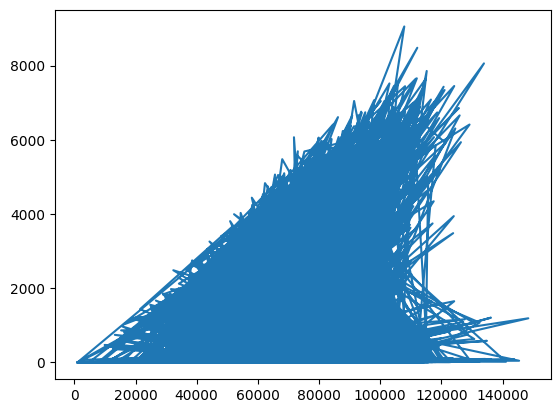